# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
#making a dataframe from the 
data = pd.read_csv("hotel_bookings.csv")
df = pd.DataFrame(data)



## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [327]:
#getting an overview of my data
print(df.info())
#print(df.head(10).to_string())
# checking for duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [328]:
#dropping columns; see my notes and observations; ignore errors so I dont see spam while testing code.
drop_columns = ['agent','company','market_segment', 'distribution_channel','days_in_waiting_list']
df.drop(drop_columns, axis=1,inplace=True,errors='ignore')

In [329]:
# change data type to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [330]:
#checking values for why this column is stored as float
print(df['children'].value_counts(dropna=False))

#column contains nulls stored as text; handling the null values
df.fillna({'children': 0}, inplace=True)

#change children column to int
df['children'] = df['children'].astype('int64')

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: count, dtype: int64


In [331]:
#list of columns to convert to string based on them still being under the "object" data type
string_list = df.select_dtypes(include=['object']).columns.to_list()

#loop through string list and convert columns to string dtypes
for each in string_list:
    df[each] = df[each].astype('string')

#visual check of the changes so far
print(df.dtypes)


hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                              string[python]
country                           string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type                string[python]
booking_changes                            int64
deposit_type        

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

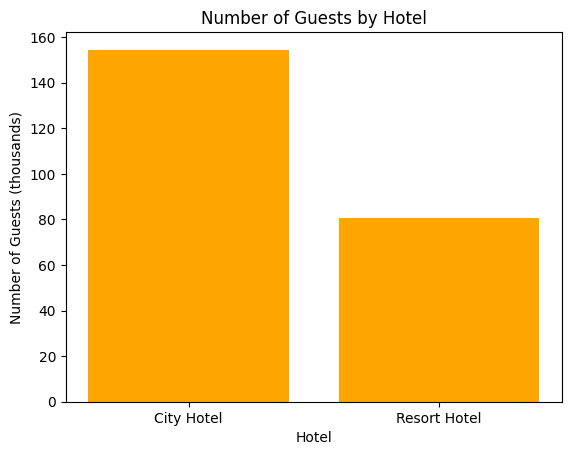

In [332]:
#the hotel chain is looking to expand one of their branches; which hotel has the most visitors?
#creating a separate column to combine adults/children/babies
df['guests'] = df[['adults','children','babies']].sum(axis=1)

#visual check to make sure new column is functional
#print(df.head().to_string())

#grouping & summing guest count based on which hotel they stay at
guestgraph = df.groupby('hotel')['guests'].sum().reset_index()

#bar graph setup inputs
plt.bar(guestgraph['hotel'],guestgraph['guests']/1000,color='orange')
plt.xlabel('Hotel')
plt.ylabel('Number of Guests (thousands)')
plt.title('Number of Guests by Hotel')
#making the x tick labels easier to read
plt.xticks(rotation=0)
plt.show() 

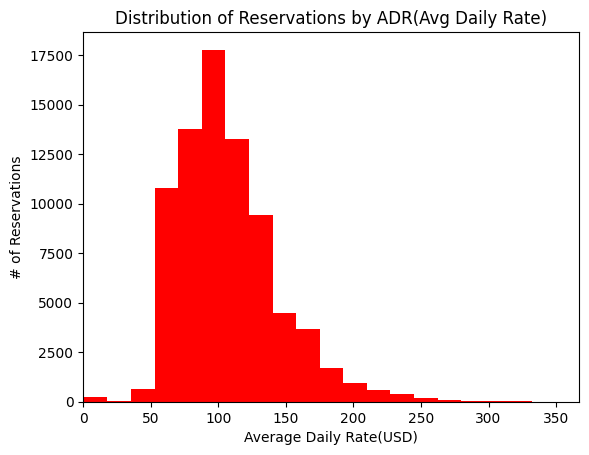

In [333]:
#seeing the previous graph the hotel chain will expand the City Hotel;
#before building, they want to evaluate what price they can charge each night the new rooms are rented out based on what price their customers are currently reserving.

#filtering outliers in the adr column and filtering by City Hotel records only
adr_less350 = df[(df['adr'] <= 350)&(df['adr'] >0)&(df['hotel']=='City Hotel')]

#histogram with a distribution of records based on their adr
plt.hist(adr_less350['adr'],bins=20,color='red')
plt.title('Distribution of Reservations by ADR(Avg Daily Rate)')
plt.xlabel('Average Daily Rate(USD)')
plt.ylabel('# of Reservations')
#fixing the x-axis 0-value was visually seperated from y-axis 0-value.
plt.xlim(0)
plt.show() 

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 


In [334]:
#1. Values that are "valid" entries but make no sense. Also why is there a distinction between "children" and "babies"? No check out date leaves the data vague.
#2. They have detailed information like country of origin but lack the check out date and how many nights the total stay was for. The most concerning thing is the accuracy of the data. A number of columns were vague in explanation or improbable. (see adults column having 50 adults or 0 adults)
#3. I fixed the most noteable issues before I began the visualization portion but I found a few more inconsistencies during the vizualization phase that will need to be fixed.
#3.(continued) Parse the stay dates to make them more useable.